# [Data Cleaning & Exploratory Data Analysis](#'project_3/BavdaConsultingNLPDataCleaning')

## Table of Contents
   - [Data Cleaning](#Data-Cleaning)
   - [Summary Statistics and Visualizations Created.](#Summary-Statistics-and-Visualizations-Created.)


### Import statements are below

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tqdm import tqdm
from pprint import pprint
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer




import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

# tell spaCy to use the english language
nlp = spacy.load('en_core_web_sm')
# add sentiment analysis to your pipeline
nlp.add_pipe('spacytextblob')


### Loading Datasets from Import Notebook

In [13]:
dfg = pd.read_csv('./data/google818.csv')
dfa = pd.read_csv('./data/apple818.csv')

## [Data Cleaning](#Data-Cleaning)

In [14]:
dfa.shape

(3000, 84)

In [15]:
dfg.shape

(3000, 84)

In [8]:
dfa.columns

Index(['Unnamed: 0', 'all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_is_blocked',
       'author_patreon_flair', 'author_premium', 'awarders', 'can_mod_post',
       'contest_mode', 'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_created_from_ads_ui', 'is_crosspostable', 'is_meta',
       'is_original_content', 'is_reddit_media_domain', 'is_robot_indexable',
       'is_self', 'is_video', 'link_flair_background_color',
       'link_flair_css_class', 'link_flair_richtext', 'link_flair_template_id',
       'link_flair_text', 'link_flair_text_color', 'link_flair_type', 'locked',
       'media_only', 'no_follow', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'pinned', 'pwls',
       'removed_by_category', 'retrieved_on', 'score', 'selftext',
       'send_replies', 'spoiler', 'stickied', 'subre

In [40]:
dfg.columns

Index(['created_utc', 'apple', 'selftext', 'full_link', 'url', 'id',
       'num_comments', 'title', 'num_crossposts'],
      dtype='object')

### Creating  the target variable, 'apple', where 1 indicate Apple whereas 0 indicates Google in each dataset. 

In [17]:
dfg['apple']=0

dfa['apple']=1



### Relevant columns from both identified, merged, and checked

In [18]:
dfg=dfg[['created_utc', 'apple', 'selftext', 'full_link', 'url', 'id', 'num_comments', 'title', 'num_crossposts']]
dfa=dfa[['created_utc', 'apple', 'selftext', 'full_link', 'url', 'id', 'num_comments', 'title', 'num_crossposts']]

In [55]:
results=[dfa, dfg]
df=pd.concat(results, ignore_index=True)
df

,created_utc,apple,selftext,full_link,url,id,num_comments,title,num_crossposts
0,1629169721,1,[removed],https://www.reddit.com/r/apple/comments/p5vi7i...,https://www.reddit.com/r/apple/comments/p5vi7i...,p5vi7i,0,Citizens one + Apple customer service issues,0
1,1628782441,1,So a while back I heard Apple might be coming ...,https://www.reddit.com/r/apple/comments/p329rb...,https://www.reddit.com/r/apple/comments/p329rb...,p329rb,2,Apple Wi-Fi rumors,0
2,1627573674,1,[removed],https://www.reddit.com/r/apple/comments/ou02cq...,https://www.reddit.com/r/apple/comments/ou02cq...,ou02cq,2,Does Apple Outsource All Customer Service Over...,0
3,1626632988,1,[removed],https://www.reddit.com/r/apple/comments/omwb6q...,https://www.reddit.com/r/apple/comments/omwb6q...,omwb6q,0,This Apple customer service rep. ❤️,0
4,1625171854,1,[removed],https://www.reddit.com/r/apple/comments/obun7k...,https://www.reddit.com/r/apple/comments/obun7k...,obun7k,1,How can I communicate with customer service?,0
...,...,...,...,...,...,...,...,...,...
5995,1558290823,0,NaN,https://www.reddit.com/r/google/comments/bqkad...,https://www.quora.com/Why-do-Yelp-reviews-almo...,bqkadd,1,(4) Anochai FDM's answer to Why do Yelp review...,0
5996,1558287699,0,NaN,https://www.reddit.com/r/google/comments/bqjol...,https://i.redd.it/wotab45vf7z21.png,bqjolk,26,Anyone know how to fix this dark mode issue. I...,0
5997,1558286521,0,NaN,https://www.reddit.com/r/google/comments/bqjgk...,https://www.youtube.com/attribution_link?a=09I...,bqjgk3,0,Is The Google Home Mini Worth It In 2019?,0
5998,1558281690,0,"Hi, my name is Nikita and I from Russia. I jus...",https://www.reddit.com/r/google/comments/bqijz...,https://www.reddit.com/r/google/comments/bqijz...,bqijzc,1,Need help (Software engineers),0


## Check for Duplicates

In [42]:
df[df.duplicated(subset='id')].id.value_counts()[:2]


Series([], Name: id, dtype: int64)

In [43]:
df[df.duplicated(subset='selftext')].selftext.value_counts()[:2]

[removed]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   2169
\n\nWelcome to the daily Tech Support thread for /r/Apple. \n\nHave a q

In [56]:
df.drop_duplicates(subset=['selftext'], keep='first', inplace=True)
df

,created_utc,apple,selftext,full_link,url,id,num_comments,title,num_crossposts
0,1629169721,1,[removed],https://www.reddit.com/r/apple/comments/p5vi7i...,https://www.reddit.com/r/apple/comments/p5vi7i...,p5vi7i,0,Citizens one + Apple customer service issues,0
1,1628782441,1,So a while back I heard Apple might be coming ...,https://www.reddit.com/r/apple/comments/p329rb...,https://www.reddit.com/r/apple/comments/p329rb...,p329rb,2,Apple Wi-Fi rumors,0
21,1617568289,1,It has been my experience that Apple’s support...,https://www.reddit.com/r/apple/comments/mk47vq...,https://www.reddit.com/r/apple/comments/mk47vq...,mk47vq,227,Have anyone noticed a massive drop off in Supp...,0
25,1612136462,1,I just have to get this off my chest because I...,https://www.reddit.com/r/apple/comments/l9p9ws...,https://www.reddit.com/r/apple/comments/l9p9ws...,l9p9ws,22,Apple isn't listening so I thought I'd just tr...,0
29,1608925887,1,"Hello, I am a student and use Pearson for Stat...",https://www.reddit.com/r/apple/comments/kk4vv2...,https://www.reddit.com/r/apple/comments/kk4vv2...,kk4vv2,2,Upgrade operating system message,0
...,...,...,...,...,...,...,...,...,...
5974,1558313935,0,For many months Timeline has been flakey on my...,https://www.reddit.com/r/google/comments/bqola...,https://www.reddit.com/r/google/comments/bqola...,bqola0,0,Google Timeline Issue,0
5976,1558313021,0,I hope I live long enough to see Bill and Hill...,https://www.reddit.com/r/google/comments/bqofm...,https://www.reddit.com/r/google/comments/bqofm...,bqofm2,0,Bill and Hillary Clinton,0
5978,1558307388,0,[https://support.google.com/websearch/thread/...,https://www.reddit.com/r/google/comments/bqnh3...,https://www.reddit.com/r/google/comments/bqnh3...,bqnh3i,0,Safesearch broken,0
5981,1558305003,0,"Hi\n\nI'm trying to make a list of ""flip-a-swi...",https://www.reddit.com/r/google/comments/bqn1h...,https://www.reddit.com/r/google/comments/bqn1h...,bqn1hz,0,"Help me make a list of ""flip-a-switch"" feature...",0


## Checked for removed and deleted posts. Converted to NaN's-small amount so dropped.

In [57]:
df.selftext.replace({'[removed]': np.nan, '[deleted]':np.nan}, inplace = True)
df

,created_utc,apple,selftext,full_link,url,id,num_comments,title,num_crossposts
0,1629169721,1,NaN,https://www.reddit.com/r/apple/comments/p5vi7i...,https://www.reddit.com/r/apple/comments/p5vi7i...,p5vi7i,0,Citizens one + Apple customer service issues,0
1,1628782441,1,So a while back I heard Apple might be coming ...,https://www.reddit.com/r/apple/comments/p329rb...,https://www.reddit.com/r/apple/comments/p329rb...,p329rb,2,Apple Wi-Fi rumors,0
21,1617568289,1,It has been my experience that Apple’s support...,https://www.reddit.com/r/apple/comments/mk47vq...,https://www.reddit.com/r/apple/comments/mk47vq...,mk47vq,227,Have anyone noticed a massive drop off in Supp...,0
25,1612136462,1,I just have to get this off my chest because I...,https://www.reddit.com/r/apple/comments/l9p9ws...,https://www.reddit.com/r/apple/comments/l9p9ws...,l9p9ws,22,Apple isn't listening so I thought I'd just tr...,0
29,1608925887,1,"Hello, I am a student and use Pearson for Stat...",https://www.reddit.com/r/apple/comments/kk4vv2...,https://www.reddit.com/r/apple/comments/kk4vv2...,kk4vv2,2,Upgrade operating system message,0
...,...,...,...,...,...,...,...,...,...
5974,1558313935,0,For many months Timeline has been flakey on my...,https://www.reddit.com/r/google/comments/bqola...,https://www.reddit.com/r/google/comments/bqola...,bqola0,0,Google Timeline Issue,0
5976,1558313021,0,I hope I live long enough to see Bill and Hill...,https://www.reddit.com/r/google/comments/bqofm...,https://www.reddit.com/r/google/comments/bqofm...,bqofm2,0,Bill and Hillary Clinton,0
5978,1558307388,0,[https://support.google.com/websearch/thread/...,https://www.reddit.com/r/google/comments/bqnh3...,https://www.reddit.com/r/google/comments/bqnh3...,bqnh3i,0,Safesearch broken,0
5981,1558305003,0,"Hi\n\nI'm trying to make a list of ""flip-a-swi...",https://www.reddit.com/r/google/comments/bqn1h...,https://www.reddit.com/r/google/comments/bqn1h...,bqn1hz,0,"Help me make a list of ""flip-a-switch"" feature...",0


In [46]:
df.isnull().sum()

created_utc       0
apple             0
selftext          3
full_link         0
url               0
id                0
num_comments      0
title             0
num_crossposts    0
dtype: int64

In [58]:
df.dropna(inplace=True)

In [48]:
df

,created_utc,apple,selftext,full_link,url,id,num_comments,title,num_crossposts
1,1628782441,1,So a while back I heard Apple might be coming ...,https://www.reddit.com/r/apple/comments/p329rb...,https://www.reddit.com/r/apple/comments/p329rb...,p329rb,2,Apple Wi-Fi rumors,0
21,1617568289,1,It has been my experience that Apple’s support...,https://www.reddit.com/r/apple/comments/mk47vq...,https://www.reddit.com/r/apple/comments/mk47vq...,mk47vq,227,Have anyone noticed a massive drop off in Supp...,0
25,1612136462,1,I just have to get this off my chest because I...,https://www.reddit.com/r/apple/comments/l9p9ws...,https://www.reddit.com/r/apple/comments/l9p9ws...,l9p9ws,22,Apple isn't listening so I thought I'd just tr...,0
29,1608925887,1,"Hello, I am a student and use Pearson for Stat...",https://www.reddit.com/r/apple/comments/kk4vv2...,https://www.reddit.com/r/apple/comments/kk4vv2...,kk4vv2,2,Upgrade operating system message,0
31,1607465909,1,"As of today, I dropped my 2018 15"" MacBook Pro...",https://www.reddit.com/r/apple/comments/k9eg93...,https://www.reddit.com/r/apple/comments/k9eg93...,k9eg93,0,For anyone who recently got a logic board repl...,0
...,...,...,...,...,...,...,...,...,...
5974,1558313935,0,For many months Timeline has been flakey on my...,https://www.reddit.com/r/google/comments/bqola...,https://www.reddit.com/r/google/comments/bqola...,bqola0,0,Google Timeline Issue,0
5976,1558313021,0,I hope I live long enough to see Bill and Hill...,https://www.reddit.com/r/google/comments/bqofm...,https://www.reddit.com/r/google/comments/bqofm...,bqofm2,0,Bill and Hillary Clinton,0
5978,1558307388,0,[https://support.google.com/websearch/thread/...,https://www.reddit.com/r/google/comments/bqnh3...,https://www.reddit.com/r/google/comments/bqnh3...,bqnh3i,0,Safesearch broken,0
5981,1558305003,0,"Hi\n\nI'm trying to make a list of ""flip-a-swi...",https://www.reddit.com/r/google/comments/bqn1h...,https://www.reddit.com/r/google/comments/bqn1h...,bqn1hz,0,"Help me make a list of ""flip-a-switch"" feature...",0


,created_utc,apple,num_comments,num_crossposts
count,1.297000e+03,1297.000000,1297.000000,1297.0
mean,1.569593e+09,0.468003,4.922899,0.0
std,9.699154e+06,0.499168,29.242973,0.0
min,1.558282e+09,0.000000,0.000000,0.0
25%,1.560985e+09,0.000000,0.000000,0.0
50%,1.563473e+09,0.000000,0.000000,0.0
75%,1.577296e+09,1.000000,1.000000,0.0
max,1.628782e+09,1.000000,531.000000,0.0


## Max Feature Depth and Max Document Frequency will be used to distinguish the two subreddits based on customer service rather than buzzwords from Apple and Google.

In [64]:
df['selftext']=df['selftext'].str.lower()
df['title']=df['title'].str.lower()

In [63]:
df['selftext'].head(20)

1      so a while back i heard apple might be coming ...
21     it has been my experience that apple’s support...
25     i just have to get this off my chest because i...
29     hello, i am a student and use pearson for stat...
31     as of today, i dropped my 2018 15" macbook pro...
51     first-time apple customer here.\n\nmy laptop w...
53     as you may have seen, i sent the following twe...
57     in february, i decided to finally upgrade my i...
59     on march 23rd i broke the screen on my 11max p...
63     i just had one of the worst customer service e...
64     dell's u3818dw and u3419w monitors violate usb...
66     i was a genius for 3yrs, no longer am one, but...
70     here is the video of messages \nhttps://www.re...
71     hi there! this year my goal was to get a job w...
72     last year apple had a company wide profit marg...
74     i recently received a hand-me-down 2015 macboo...
80     anyone have macbook air 2019 bluetooth keyboar...
82     i really liked the new 1

## Below, 'title' and 'selftext' are combined to make the vectorizer easier.

In [71]:
df.title=df.title.apply(lambda x: x + '.')
df['text']=df.title + ' ' + df.selftext
df.reset_index(inplace=True)

In [5]:
lemmapos=['']
lemmatext=['']
lemmapos=[nlp(doc).pos for doc in df['text'][5:10]]
lemmatext=[nlp(doc).text for doc in df['text'][5:10]]
print (lemmapos, lemmatext)

NameError: name 'df' is not defined

### [Summary Statistics and Visualizations Created.](#Summary-Statistics-and-Visualizations-Created.)

In [65]:
df.describe()

,created_utc,apple,num_comments,num_crossposts
count,1.297000e+03,1297.000000,1297.000000,1297.0
mean,1.569593e+09,0.468003,4.922899,0.0
std,9.699154e+06,0.499168,29.242973,0.0
min,1.558282e+09,0.000000,0.000000,0.0
25%,1.560985e+09,0.000000,0.000000,0.0
50%,1.563473e+09,0.000000,0.000000,0.0
75%,1.577296e+09,1.000000,1.000000,0.0
max,1.628782e+09,1.000000,531.000000,0.0


In [66]:
df.corr()[['apple']][(df.corr()['apple'].sort_values().abs() > .25)],

<ipython-input-66-37d2ef5e2b7d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.corr()[['apple']][(df.corr()['apple'].sort_values().abs() > .25)],


(                apple
 created_utc  0.781482
 apple        1.000000,)

[Text(0.5, 1.0, 'Correlation with Companies')]

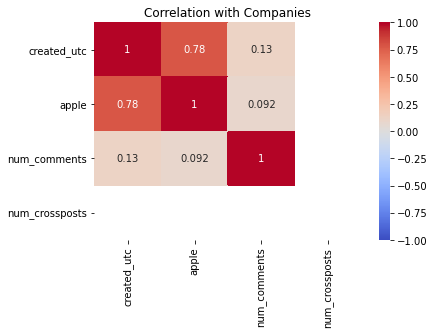

In [67]:
ax=sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
ax.set(title = "Correlation with Companies")

## Data Types checked to ensure modeling success.

In [68]:
df.dtypes

created_utc        int64
apple              int64
selftext          object
full_link         object
url               object
id                object
num_comments       int64
title             object
num_crossposts     int64
dtype: object

In [72]:
df.to_csv('data/modeling.csv')

## Exploratory Data Analysis is continued in the modeling section.
### There are multiple iterations in the data science process, and therefore, this is not completely linear. Please click on the link below to continue.
### [Modeling, Data Visualization, and Conclusions Notebook] (/BavdaConsultingNLPModelingConclusions)